In [1]:
%load_ext autoreload

In [2]:
%autoreload 
import pathlib
import matplotlib.pyplot as plt
from ssd.config.defaults import cfg
from demo import run_demo

In [3]:
#config_file = "configs/vgg_ssd300_voc0712_tdt4265_server.yaml"
config_file = "configs/mnist_tdt4265_server-improved.yaml"

ckpt = None # The path to the checkpoint for test, default is the latest checkpoint
score_threshold = 0.7
images_dir = "demo/mnist" # chage to "demo/mnist" for MNIST or demo/voc for VOC
dataset_type = "mnist" # change to "mnist" for MNIST. or voc for VOC

cfg.merge_from_file(config_file)
cfg.freeze()

print("Loaded configuration file {}".format(config_file))
with open(config_file, "r") as cf:
    config_str = "\n" + cf.read()
print("Running with config:\n{}".format(cfg))

drawn_images = run_demo(
    cfg=cfg,ckpt=ckpt,
    score_threshold=score_threshold,
    images_dir=pathlib.Path(images_dir),
    output_dir=pathlib.Path(images_dir, "result"),
    dataset_type=dataset_type)


Loaded configuration file configs/mnist_tdt4265_server-improved.yaml
Running with config:
DATASETS:
  TEST: ('mnist_detection_val',)
  TRAIN: ('mnist_detection_train', 'mnist_detection_val')
DATASET_DIR: /work/datasets
DATA_LOADER:
  NUM_WORKERS: 4
  PIN_MEMORY: True
EVAL_STEP: 500
INPUT:
  IMAGE_SIZE: [300, 300]
  PIXEL_MEAN: [123.675, 116.28, 103.53]
  PIXEL_STD: [1, 1, 1]
LOG_STEP: 10
MODEL:
  BACKBONE:
    INPUT_CHANNELS: 3
    NAME: improved_basic
    OUT_CHANNELS: (256, 512, 256, 256, 128, 128)
    PRETRAINED: False
  CENTER_VARIANCE: 0.1
  NEG_POS_RATIO: 3
  NUM_CLASSES: 11
  PRIORS:
    ASPECT_RATIOS: [[2], [2, 3], [2, 3], [2, 3], [2], [2]]
    BOXES_PER_LOCATION: [4, 6, 6, 6, 4, 4]
    CLIP: True
    FEATURE_MAPS: [[38, 38], [19, 19], [10, 10], [5, 5], [3, 3], [1, 1]]
    MAX_SIZES: [[40, 40], [111, 111], [162, 162], [213, 213], [264, 264], [315, 315]]
    MIN_SIZES: [[10, 10], [40, 40], [111, 111], [162, 162], [213, 213], [264, 264]]
    STRIDES: [[8, 8], [16, 16], [32, 32], 

Predicting on images:   0%|          | 0/15 [00:00<?, ?it/s]

Loaded weights from outputs/improved_basic/model_final.pth


Predicting on images: 100%|██████████| 15/15 [00:01<00:00,  8.20it/s]


Number of images: 15


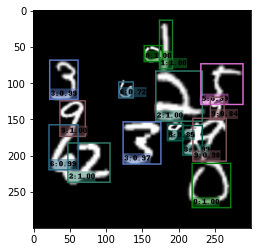

In [7]:
# Example to plot the first drawn image
print("Number of images:", len(drawn_images))
plt.imshow(drawn_images[0])

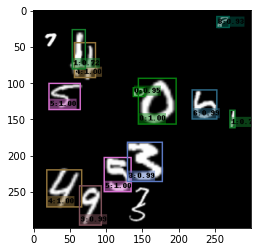

In [5]:
plt.imshow(drawn_images[1])